# **Proyek Akhir Belajar Machine Learning untuk Pemula**








Data Diri

> Nama: Amanda Clara Dwi Putri

> Email: amandaclaradwip@gmail.com

> No. Telepon: 083829604487

> Kota Domisili: Kabupaten Bandung

> Tempat, tanggal lahir: Bandung, 2 Mei 2000

> Pekerjaan: Mahasiswa

---













In [ ]:
# import library yang dibutuhkan 
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
# mempersiapkan data set
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-03 03:45:22--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.60MB/s    in 61s     

2021-07-03 03:46:24 (5.02 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# ekstrasi file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# membuat direktori data batu, kertas dan gunting
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# augmentasi data dengan image generator
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 200,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)
 
val_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 200,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)

In [ ]:
# mempersiapkan data latih yang akan dipelajari oleh model
train_gen = train_datagen.flow_from_directory(
        base_dir,  
        target_size = (150, 150),  
        batch_size = 32,
        shuffle = True,
        class_mode = 'categorical',
        subset = 'training')

val_gen = val_datagen.flow_from_directory(
        base_dir, 
        target_size = (150, 150), 
        batch_size = 32, 
        shuffle = True,
        class_mode = 'categorical',
        subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# membangun model dengan model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# menampilkan rangkuman model yang telah terbentuk
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
# melakukan compile pada model
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
# melatih model dengan model.fit dan callbacks sebagai kriteria stop
callback_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 2,
    min_delta = 0.001,
    mode = 'auto')

model_train = model.fit(
          train_gen,
          steps_per_epoch = 35,  
          epochs = 200, 
          validation_data = val_gen, 
          validation_steps = 4,
          callbacks=[callback_stopping],  
          verbose = 2)

Epoch 1/200
35/35 - 47s - loss: 0.1543 - accuracy: 0.9532 - val_loss: 0.1232 - val_accuracy: 0.9531
Epoch 2/200
35/35 - 46s - loss: 0.1015 - accuracy: 0.9670 - val_loss: 0.0852 - val_accuracy: 0.9766
Epoch 3/200
35/35 - 46s - loss: 0.0727 - accuracy: 0.9716 - val_loss: 0.0431 - val_accuracy: 0.9844
Epoch 4/200
35/35 - 46s - loss: 0.0915 - accuracy: 0.9734 - val_loss: 0.1527 - val_accuracy: 0.9844
Epoch 5/200
35/35 - 47s - loss: 0.0875 - accuracy: 0.9634 - val_loss: 0.2022 - val_accuracy: 0.9609


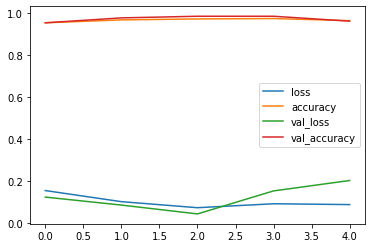

In [ ]:
# melakukan plotting hasil accuracy dan loss

pd.DataFrame(model_train.history).plot()
plt.show()

Saving WhatsApp_Image_2021-07-02_at_12.06.54_PM-removebg-preview (1).jpg to WhatsApp_Image_2021-07-02_at_12.06.54_PM-removebg-preview (1) (4).jpg
WhatsApp_Image_2021-07-02_at_12.06.54_PM-removebg-preview (1).jpg
Image is Scissors


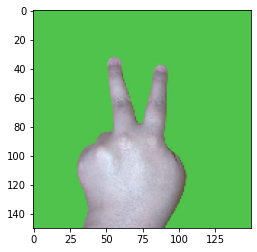

In [ ]:
# melakukan prediksi gambar
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0] == 1:
    print('Image is Paper')
  elif classes[0][1] == 1:
    print('Image is Rock')
  else:
    print('Image is Scissors')